# Jbolo notebook example
This example notebook reads a yaml file describing an experiment, then runs jbolo once to determine all the optical loads, NEPs, NETs, etc.  It then proceeds to print and plot various results from the simulation.

The yaml file is loaded into a dictionary called 'sim'.  The results of the calculations are all added to that dictionary, in sim['outputs'].  The user is encouraged to run jbolo and then explore the dictionary structure to find what is there.

Note that the example yaml file uses flat bands, and therefore the frequency vectors span only the band.  If a band file is used, the frequency vectors (set by the low and high frequencies in the yaml file) should span the entire range you want to integrate over.  

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Make inline plots in this notebook, make them reasonable sizes, and with legible font size
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [12, 8]

# Note:  your sys.path needs to have the path to the jbolo/python functions defined.
# For example, on my mac running anaconda python, I insert it in
# ~/.ipython/profile_default/ipython_config.py
#  ## lines of code to run at IPython startup.
#c.InteractiveShellApp.exec_lines = [
#    "sys.path.append('/Users/ruhl/code/jbolo/python')"
#    ]
# Or, you can do this in every notebook you use this stuff in:
# sys.path.insert(0,'/Users/ruhl/code/jbolo/python/')

In [24]:
# List what yaml files you have so you can choose one for the next line.
!ls yamls 

Example_experiment.yaml


In [76]:
%run RunOnce.py yamls/Example_experiment.yaml

# or, if you want an output pickle file to store the whole sim:
# %run python/jbolo.py yamls/Example_experiment.yaml --pkl_out='output_pickle_filename.pkl'

# Note that you can run jbolo.py from the command line if you prefer,
# python python/RunOnce.py yamls/Example_experiment.yaml

20211210 : Example_experiment
                      LF_1       LF_2       MF_1       MF_2       HF_1       HF_2
 det_bandcenter :    25.750     38.740     91.450    148.450    227.076    285.500  
  det_bandwidth :     8.500     17.500     28.900     40.900     58.123     59.100  
 sys_bandcenter :    26.090     39.655     92.657    149.462    227.636    285.556  
  sys_bandwidth :     6.543     13.424     23.087     35.890     56.907     58.778  
 sky_bandcenter :    26.072     41.814     92.899    152.633    226.735    278.375  
  sky_bandwidth :     6.537     14.190     23.135     36.665     56.709     57.392  
          P_opt :     0.267      1.368      1.549      4.701     12.560     16.885  
         P_elec :     0.483      2.812      3.051      7.809     19.140     25.545  
          P_sat :     0.750      4.180      4.600     12.510     31.700     42.430  
       loopgain :  1000.000   1000.000   1000.000   1000.000   1000.000   1000.000  
         F_link :     0.524      0.524

Let's look at the sim dictionary and see what's there.  All of the keys except 'outputs' came directly from the yaml file inputs.

In [6]:
print(sim.keys())

dict_keys(['version', 'config', 'sources', 'optics_defaults', 'optical_elements', 'bolo_config', 'readout', 'channels', 'outputs'])


Now let's look at the outputs;  you'll see it's organized by detector channel.

In [7]:
print(sim['outputs'].keys())

dict_keys(['LF_1', 'LF_2', 'MF_1', 'MF_2', 'HF_1', 'HF_2'])


Each channel has a long list of output keys associated with it. 

Some of these have scalar values associated with them, like NET's or NEP's.  Some have numpy vectors associated with them, which give the frequency dependent value of some parameter.  In those cases the associated frequencies (in GHz) can be found in sim['outputs']['MF_1']['nu'] .

First let's look at the keys, then describe them.



In [20]:
print(sim['outputs']['MF_1'].keys())

dict_keys(['optics', 'sources', 'nu', 'det_bandwidth', 'det_bandcenter', 'sys_bandwidth', 'sys_bandcenter', 'optics_effic_total', 'optics_Pnu_total', 'sky_bandwidth', 'sky_bandcenter', 'P_opt', 'Pnu_total', 'aperture_factor', 'stop_factor', 'NEP_photonNC', 'NEP_photon_poissonNC', 'NEP_photon_boseNC', 'NEP_photonNC_v2', 'NEP_photon_poissonNC_v2', 'NEP_photon_boseNC_v2', 'n_avg', 'NEP_photonC', 'NEP_photon_poissonC', 'NEP_photon_boseC', 'dpdt', 'P_sat', 'G_dynamic', 'F_link', 'NEP_phonon', 'NEP_johnson', 'NEP_readout', 'NEP_NC_total', 'NEP_C_total', 'corr_factor', 'NET_NC_total', 'NET_C_total', 'NET_C_wafer', 'NET_NC_wafer'])


Channel output key descriptions:

- optics: each optical element is key, with scalars or numpy vectors of parameter vs frequency for each key under it.  For vectors, the matching frequency vector is in sim['outputs']['nu']. The parameters stored here include:
 - Pnu : a vector of the Watts/Hz this optical element, incident on the next element, for the AOmega of the detector system.
 - P_opt : a scalar (Watts), the contribution of this element to detector loading.
 - effic : a vector of the optical efficiency of this element as a function of frequency.
 - effic_cumul : a vector of the total optical efficiency from the detector through (not to) this element, as a function of frequency.
 
- sources:  each source listed in the yaml file (atmosphere and cmb in the example yaml), with the same info underneath it as for the optical elements listed above, ie scalar P_opt, and vectors Pnu, effic, and effic_cumul.

- nu : the frequency vector used for all calculations.

- det_bandwidth : the (photon) bandwidth of the detector response.
- det_bandcenter : the center of the detector response band.
- sys_bandwidth : the bandwidth of the system response from the detector to the last instrument element before the sky/atmosphere.
- sys_bandcenter : the center of the system response band.
- sky_bandwidth: the bandwidth of the response above the atmosphere.
- sky_bandcetner: the center of the response above the atmosphere.
- optics_effic_total: optical efficiency of the optics, vs frequency (a vector).
- optics_Pnu_total: optical loading in Watts/Hz of the optics, incident on the detector/horns, a vector.
- P_opt:  the total optical loading on the detector from all sources.
- Pnu_total:  the total frequency dependent loading on the detector in Watts/Hz from all sources, a vector.
- aperture_factor: for the photon noise horn correlation calculation.
- stop_factor:  for the photon noise horn correlation calculation.
- Photon noise parameters:  a whole mess of these are reported, because we're interested in the bose and poisson contributions, and in the corrections for horn correlations in an array.  If you see an "NC" (No Correlations) at the end of the name, it means that it is not corrected for horn-horn correlations and is appropriate for single-detector calculations.  If you see a "C" ("Correlations") at the end it means it is corrected for horn-horn correlations, and is appropriate for wafer calculations.  If you see a "v2" at the end that means it's an alternate formula I used as a crosscheck.  
- NET's are all in K*sqrt(sec);  "C" and "NC" at the end of a name mean the same thing as above.
- NEP's are all in Watts/sqrt(Hz);  "C" and "NC" at the end of a name mean the same thing as above.
- "corr_factor" is the correlation factor defined in the BoloCalc manual, which applies to the total NEP or NET in going from single detector to wafer values.
- dpdt : the dP_optical/dT_cmb, for conversion between NEP and NET_cmb.
- P_sat : the saturation power of the detector
- G_dynamic : dP_bolo/dT_bolo, ie the dynamic thermal conductance.
- F_link : the relevant factor by this name for the legs in the phonon NEP calculation.



In [29]:
# An example scalar value for one channel
print(sim['outputs']['MF_1']['NEP_C_total'])

2.5703433581754487e-17


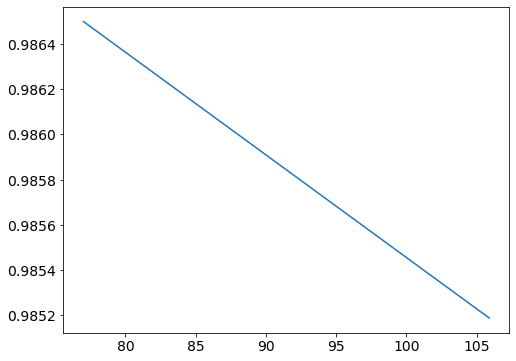

In [33]:
# An example frequency dependent value for one channel.
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(sim['outputs']['MF_1']['nu'],sim['outputs']['MF_1']['optics']['window']['effic'])

# Example:  plot frequency dependent optical loading and efficiency for each band

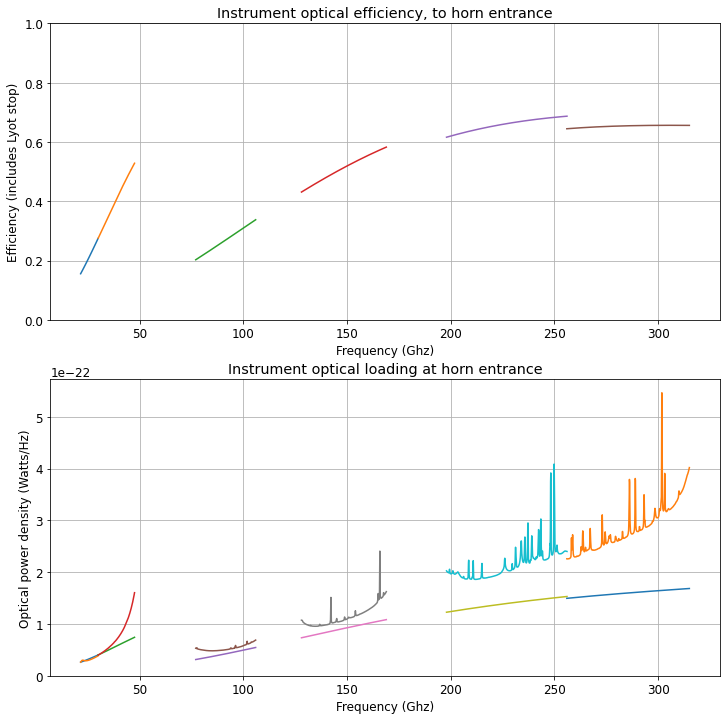

In [39]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [12, 12]

#  Show the frequency-dependent optical efficiency of the each set of optics
plt.subplot(2,1,1)
#print('Instrument optical efficiency to horns:')
for ch in sim['channels'].keys():
    plt.plot(sim['outputs'][ch]['nu'],sim['outputs'][ch]['optics_effic_total'])
    #print('  {0} : {1:4.3f}'.format(ch,np.mean(sim['outputs'][ch]['optics_effic_total'])))
plt.title('Instrument optical efficiency, to horn entrance')
plt.xlabel('Frequency (Ghz)')
plt.ylabel('Efficiency (includes Lyot stop)') 
plt.ylim(0,1)
plt.grid()

#  Show the frequency-dependent optical loading of the each set of optics
plt.subplot(2,1,2)
#print('Loading above horns:')
for ch in sim['channels'].keys():
    plt.plot(sim['outputs'][ch]['nu'],sim['outputs'][ch]['optics_Pnu_total'])
    plt.plot(sim['outputs'][ch]['nu'],sim['outputs'][ch]['Pnu_total'])
    #print('  {0} : {1:3.2e}'.format(ch,np.mean(sim['outputs'][ch]['optics_Pnu_total'])))
plt.xlabel('Frequency (Ghz)')
plt.ylabel('Optical power density (Watts/Hz)') 
plt.title('Instrument optical loading at horn entrance')
plt.ylim(0)
plt.grid()

# Example:  plot optical power density loading of each source 

This is the Watts/Hz emitted into the next element, for a single moded detector.  

avg Pnu


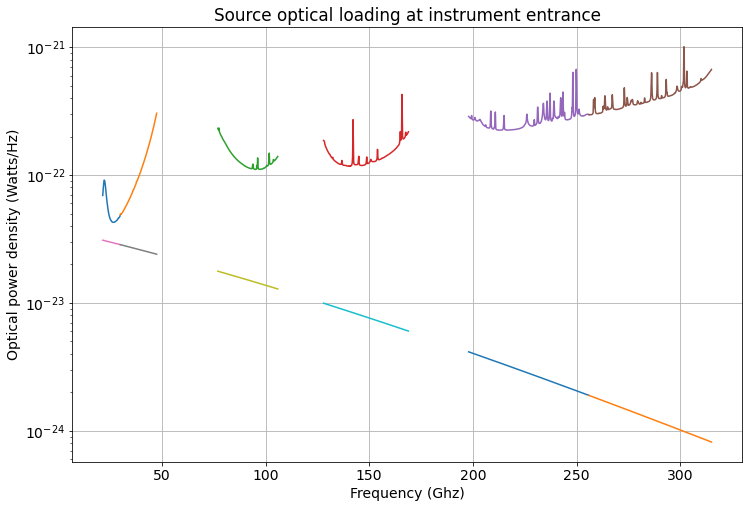

In [36]:
plt.rcParams['figure.figsize'] = [12, 8]

#  Calculate the atmospheric and cmb power incident on the front of the telescope.
#   (For use in requirements spreadsheet.)
print('avg Pnu')
for src in reversed(sim['sources'].keys()):
    #print(src)
    for ch in sim['channels'].keys():
        plt.semilogy(sim['outputs'][ch]['nu'],sim['outputs'][ch]['sources'][src]['Pnu'])
        #print('  {0} : {1:3.2e}'.format(ch,np.mean(sim['outputs'][ch]['sources'][src]['Pnu'])))

        
plt.xlabel('Frequency (Ghz)')
plt.ylabel('Optical power density (Watts/Hz)') 
plt.title('Source optical loading at instrument entrance')
plt.grid()

Print out dp/dT_cmb at the detector, and at the telescope input

In [123]:
print('dp/dTcmb at')
print('        detector,  telescope_input')
for ch in sim['channels'].keys():
    dpdt_atdetector = sim['outputs'][ch]['dpdt']
    optics_eff = np.mean(sim['outputs'][ch]['optics_effic_total'])
    det_eff = np.mean(sim['outputs'][ch]['optics']['detector']['effic'])
    dpdt_atentrance = dpdt_atdetector/(optics_eff*det_eff)
    print('  {0} : {1:3.2e}   {2:3.2e}'.format(ch,dpdt_atdetector, dpdt_atentrance))


dp/dTcmb at
        detector,  telescope_input
  LF_1 : 8.15e-15   8.02e-14
  LF_2 : 4.31e-14   2.32e-13
  MF_1 : 4.22e-14   3.73e-13
  MF_2 : 6.00e-14   3.18e-13
  HF_1 : 8.61e-14   2.42e-13
  HF_2 : 3.98e-14   1.04e-13


Print out some photon noise related quantities.

In [40]:
ch = 'HF_1'
#sim['outputs'][ch].keys()
print('n avg:')
print(sim['outputs'][ch]['n_avg'])
print('Bose:')
print(sim['outputs'][ch]['NEP_photon_boseNC'])
print(sim['outputs'][ch]['NEP_photon_boseNC_v2'])
print('Poisson:')
print(sim['outputs'][ch]['NEP_photon_poissonNC'])
print(sim['outputs'][ch]['NEP_photon_poissonNC_v2'])
print('Total:')
print(sim['outputs'][ch]['NEP_photonNC'])
print(sim['outputs'][ch]['NEP_photonNC_v2'])

n avg:
1.4228009888678599
Bose:
7.369230225470604e-17
7.369230225470604e-17
Poisson:
6.141271874917087e-17
6.141271874917087e-17
Total:
9.592745923750778e-17
9.592745923750778e-17


# Print optical powers and efficiencies for each element, for each channel.

In [43]:
# Print any on channel's optical elements table, basic properties
import jbolo_funcs as jbf
for ch in sim['channels'].keys():
    print('-----------------')
    jbf.print_optics(sim,ch)

-----------------
LF_1
Element            Popt(pW)   Effic  Effic_cumul
detector       :    0.0000     0.6300    1.0000
objlens        :    0.0000     0.9931    0.6300
lyot           :    0.0277     0.2521    0.6256
lowpass        :    0.0001     0.9400    0.1577
colimlens      :    0.0001     0.9931    0.1482
fieldlens      :    0.0001     0.9931    0.1472
nylon_filt     :    0.0000     0.9897    0.1462
alumina_filt   :    0.0042     0.9750    0.1447
RTMLI_10       :    0.0097     0.9960    0.1411
window         :    0.0053     0.9888    0.1405
secondary      :    0.1079     0.9754    0.1389
primary        :    0.0196     0.9954    0.1355
atmosphere     :    0.0593     0.9842    0.1349
cmb            :    0.0331     0.0000    0.1328
P_optical_total =  2.6698e-13
-----------------
LF_2
Element            Popt(pW)   Effic  Effic_cumul
detector       :    0.0000     0.6500    1.0000
objlens        :    0.0001     0.9926    0.6500
lyot           :    0.0288     0.4800    0.6452
lowpass   

# Print some detector info for each channel

In [42]:
# Print any on channel's optical elements table, basic properties
import jbolo_funcs as jbf
for ch in sim['channels'].keys():
    print('-----------------')
    jbf.print_detector(sim,ch)

-----------------
LF_1
  P_sat:          0.75
  F_link:         0.52
  G_dynamic:   2.10e-11
  NEP_phonon:     3.95
  NET_uncorr:   317.50
  NET_corr:     400.73
  Corr_factor:   1.262
  NET_NC_wafer:     36.23
  NET_C_wafer:     45.73
-----------------
LF_2
  P_sat:          4.18
  F_link:         0.52
  G_dynamic:   1.17e-10
  NEP_phonon:     9.32
  NET_uncorr:   255.59
  NET_corr:     266.97
  Corr_factor:   1.045
  NET_NC_wafer:     29.17
  NET_C_wafer:     30.46
-----------------
MF_1
  P_sat:          4.60
  F_link:         0.52
  G_dynamic:   1.29e-10
  NEP_phonon:     9.78
  NET_uncorr:   292.11
  NET_corr:     336.07
  Corr_factor:   1.151
  NET_NC_wafer:     11.11
  NET_C_wafer:     12.78
-----------------
MF_2
  P_sat:         12.51
  F_link:         0.52
  G_dynamic:   3.51e-10
  NEP_phonon:    16.12
  NET_uncorr:   327.31
  NET_corr:     332.14
  Corr_factor:   1.015
  NET_NC_wafer:     12.45
  NET_C_wafer:     12.63
-----------------
HF_1
  P_sat:         31.70
  F_link: 